In [10]:
# Datos de ejemplo
#X = np.array([[1], [2], [3], [4], [5]])  # Datos de entrada
#y = np.array([2, 4, 6, 8, 10])           # Etiquetas (salidas correspondientes)

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

###################################################################
# Generar datos de ejemplo para Regresión Logística

np.random.seed(100)
n_samples = 100
X, y = make_blobs(n_samples=n_samples, n_features=2, centers=2, random_state=311, cluster_std=1.6)

X_train_knn, X_test_knn, y_train_knn, y_test_knn = train_test_split(X, y, test_size=0.25, random_state=331)

###################################################################

model_knn = KNeighborsClassifier(n_neighbors=5)
model_knn.fit(X_train_knn, y_train_knn)

###################################################################

x1_knn, x2_knn = np.array([[4]]), np.array([[4]])
x_knn = np.column_stack((x1_knn, x2_knn))
y_knn_pred = model_knn.predict(x_knn)  # Predicción 1 Punto
y_train_knn_pred = model_knn.predict(X_train_knn)  # Predicción 1 Array Train
y_test_knn_pred = model_knn.predict(X_test_knn)  # Predicción 1 Array Test

###################################################################
print('Regresión Logística')
print('Score Train :', model_knn.score(X_train_knn, y_train_knn))
print('Accuracy Score :', accuracy_score(y_train_knn, y_train_knn_pred))
print('Precision Score :', precision_score(y_train_knn, y_train_knn_pred))
print('Recall Score :', recall_score(y_train_knn, y_train_knn_pred))
print('F1 Score :', f1_score(y_train_knn, y_train_knn_pred))
print()
print('Score Test :', model_knn.score(X_test_knn, y_test_knn))
print('Accuracy Score :', accuracy_score(y_test_knn, y_test_knn_pred))
print('Precision Score :', precision_score(y_test_knn, y_test_knn_pred))
print('Recall Score :', recall_score(y_test_knn, y_test_knn_pred))
print('F1 Score :', f1_score(y_test_knn, y_test_knn_pred))
print()
print('Matriz de Confusión :\n', confusion_matrix(y_test_knn, y_test_knn_pred))
print()


Regresión Logística
Score Train : 0.9733333333333334
Accuracy Score : 0.9733333333333334
Precision Score : 0.9722222222222222
Recall Score : 0.9722222222222222
F1 Score : 0.9722222222222222

Score Test : 0.92
Accuracy Score : 0.92
Precision Score : 0.9285714285714286
Recall Score : 0.9285714285714286
F1 Score : 0.9285714285714286

Matriz de Confusión :
 [[10  1]
 [ 1 13]]



Text(0, 0.5, 'x2 (feature 2)')

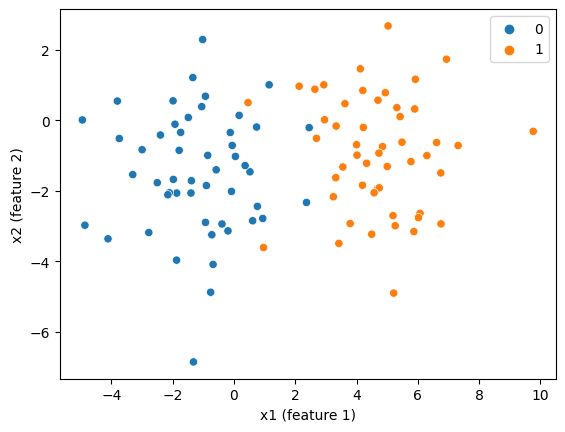

In [11]:
sns.scatterplot(x=X[:,0],
                y=X[:,1],
                hue=y)
plt.xlabel('x1 (feature 1)')
plt.ylabel('x2 (feature 2)')

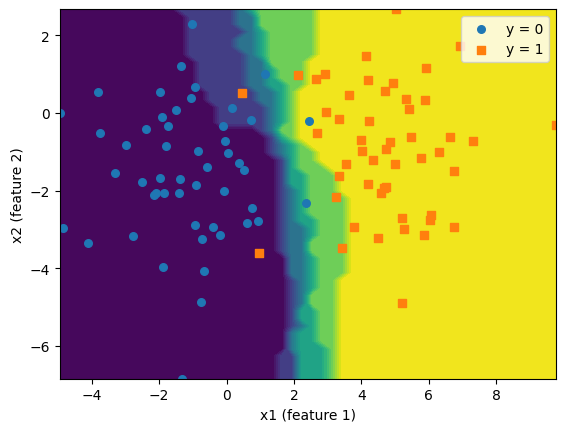

In [12]:

x_1_surf = np.linspace(X[:,0].min(), X[:,0].max())
x_2_surf = np.linspace(X[:,1].min(), X[:,1].max())
x_1_surf, x_2_surf = np.meshgrid(x_1_surf, x_2_surf)
X_surface = pd.DataFrame({'x1': x_1_surf.ravel(), 'x2': x_2_surf.ravel()})
y_pred_surface = model_knn.predict_proba(X_surface.values)[:, 1].reshape(x_1_surf.shape)


plt.contourf(x_1_surf, x_2_surf, y_pred_surface, 25,
                      vmin=0, vmax=1)
plt.scatter(X[y == 0, 0], X[y == 0, 1], c='tab:blue', s=30,
            label='y = 0', marker='o')
plt.scatter(X[y == 1, 0], X[y == 1, 1], c='tab:orange', s=30,
            label='y = 1', marker='s')
plt.xlabel('x1 (feature 1)')
plt.ylabel('x2 (feature 2)')
plt.legend(loc='best');